In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

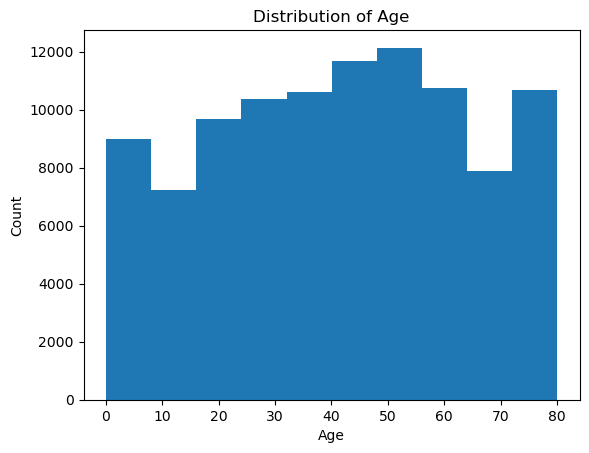

In [12]:
# Histogram for age
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

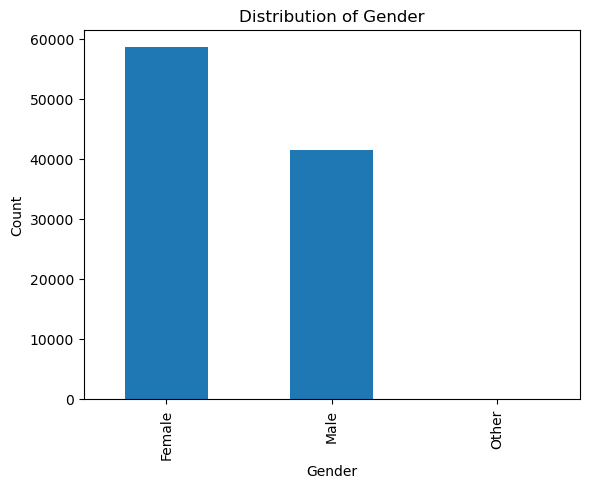

In [17]:
# Bar plot for gender
df["gender"].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

In [19]:
# Check for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicates in the dataset.")
else:
    print("No duplicates found in the dataset.")


There are 3854 duplicates in the dataset.


In [22]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [36]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=["gender", "smoking_history"], drop_first=True)

In [37]:
# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [38]:
# Build the random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [40]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.970566822672907
Precision: 1.0
Recall: 0.6711214410226612
F1 Score: 0.8031988873435326


In [41]:
# Interpret the results
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print(feature_importances)

                               Importance
HbA1c_level                  4.875510e-01
blood_glucose_level          4.058310e-01
age                          4.313618e-02
bmi                          2.523530e-02
hypertension                 2.243112e-02
heart_disease                1.281915e-02
smoking_history_former       2.003104e-03
gender_Male                  5.254902e-04
smoking_history_never        2.586298e-04
smoking_history_current      9.437765e-05
smoking_history_ever         6.684434e-05
smoking_history_not current  4.724941e-05
gender_Other                 5.652588e-07


In [49]:
# Apply the model to new patients
new_patient_data = pd.DataFrame({
    "age": [40, 55, 30],
    "gender_Male": [1, 0, 0],
    "gender_Female": [0, 1, 1],
    "gender_Other": [0, 0, 0],
    "heart_disease": [0, 0, 0],
    "hypertension": [0, 1, 1],
    "smoking_history_current": [0, 1, 0],
    "smoking_history_ever": [0, 0, 0],
    "smoking_history_former": [0, 0, 0],
    "smoking_history_never": [1, 0, 1],
    "smoking_history_not current": [0, 0, 0],
    "bmi": [26.5, 29.8, 31.2],
    "HbA1c_level": [5.8, 6.5, 5.2],
    "blood_glucose_level": [110, 160, 90]
}, columns=X_train.columns)  # Use the same column order as X_train

new_patient_predictions = model.predict(new_patient_data)
print(new_patient_predictions)


[0 0 0]
